## Learning Objective 

### Description

The dataset choosen for this experiment is hand-made dataset. We have generated the data programmatically by following Random / Gaussian distribution. The dataset includes 3000 instances where each instance is made up of 2 features.

### Clustering

Given a unfamiliar dataset, a clustering algorithm helps to discover groups of objects where the average distances between the members of each cluster are closer than to members in other clusters.

Clustering is used to find structure in unlabeled data. It’s the most common form of unsupervised learning. 

Several Algorithms have been proposed for clustering. However, when compared to other clustering algorithms the K-means algorithm is more effective. This is because K-means allows us to pre-cluster the database which in turn produces good results.

Additionally, K-means clustering is the simplest to implement and to run. All we need to do is choose the number of clusters(K) and run it number of times.

We use K-means algorithm for clustering in this experiment.

### K-means Algorithm

K-means clustering is the process of partitioning a set of data objects into subsets. Each subset is a cluster such that the similarity within the cluster is greater and the similarity between the other clusters is less. 

K-means algorithm iteratively performs this two steps: 

1. The first step assigns clusters to points by assigning them to the cluster with nearest centriod. 
2. The second step calculates the new mean from the points belonging to the cluster. 

We repeat these two steps till convergence.

#### 1. Loading the dataset

In [ ]:
# Importing required packages
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import time
from copy import deepcopy

In [ ]:
# Setting up the file. The data below is a simple Gaussian distribution of data.
dataset = "AIML_DS_CLARA_STD.csv"

In [ ]:
data=pd.read_csv(dataset)

#### 2. Getting the values and plotting them.

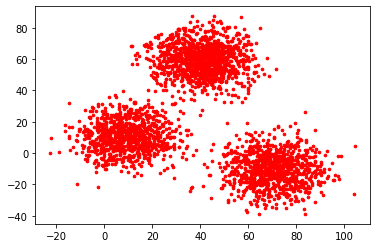

In [ ]:
# Storing the values in seperate variables
f1 = data['V1'].values
f2 = data['V2'].values
# Ploting the data
%matplotlib inline
# Combining f1 and f2 into a single array
X = np.array(list(zip(f1, f2)))
plt.scatter(f1, f2, c='red', s=7)
plt.show()

Now let us write a function to calculate Euclidean Distance between two array of points 'a' and 'b'.

In [ ]:
def dist(a, b, ax=1):
    return np.linalg.norm(a - b, axis=ax)

#### 3.We will intialize three cluster centers randomly to start the k-means algorithm.

In [ ]:
# Number of clusters
k = 5
# X coordinates of random centroids
x = np.random.randint(0, np.max(X)-20, size=k)
# Y coordinates of random centroids
y = np.random.randint(0, np.max(X)-20, size=k)
C = np.array(list(zip(x, y)), dtype=np.float32)
print(C)

[[80. 21.]
 [70. 17.]
 [70. 41.]
 [72. 24.]
 [31. 51.]]


#### This is how the data looks when the algorithm get intialized.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: Support for uppercase single-letter colors is deprecated since Matplotlib 3.1 and will be removed in 3.3; please use lowercase instead.
  This is separate from the ipykernel package so we can avoid doing imports until


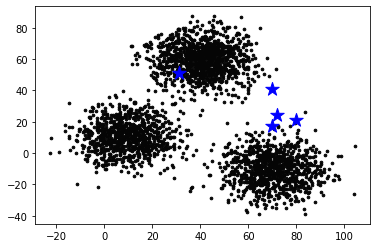

In [ ]:
# Plotting along with the Centroids
%matplotlib inline
plt.scatter(f1, f2, c='#050505', s=7)
plt.scatter(x, y, marker='*', s=200, c='B')
plt.show()

Now we will put our learning from above together and see how exactly k-means algorithm works.

### Applying  K-means algorithm 



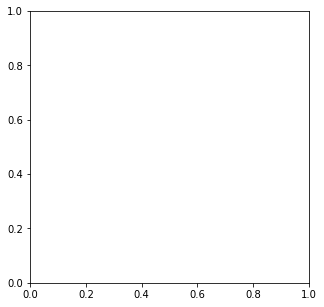

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

# To store the value of centroids when it updates
C_old = np.zeros(C.shape)
# Cluster Lables(0, 1, 2)
clusters = np.zeros(len(X))
# Error func. - Distance between new centroids and old centroids
error = dist(C, C_old, None)

# Loop will run till the error becomes zero
fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(111)
plt.ion()# turning on plot in interactive mode. This is because, as you'll see below, the plot keeps getting updated in loop.
while error >= 0.1:
    
    colors = ['r', 'g', 'b', 'y', 'c', 'm']
    
    # Assigning each value to its closest cluster
  
    for i in range(len(X)):
        distances = dist(X[i], C)#This find distance of X[i] from each of the 5 centroid points contained within C
        cluster = np.argmin(distances)# Out of all the distances found above, the centroid with the least distance is found here
        clusters[i] = cluster #The cluster center found above is now the new cluster assignment for the point X[i]

    # Storing the old centroid values
    C_old = deepcopy(C)# we use deep copy here because we don't want the changes in array C to be reflecting in C_old (because assignment is by reference)
    # Finding the new centroids by taking the average value
    
    for i in range(k):#we iterate through each of the 5 clusters.
        points = [X[j] for j in range(len(X)) if clusters[j] == i]#we pull out all the points that were assigned to the new cluster above (in 'clusters' variabe)
        C[i] = np.mean(points, axis=0)#Using the points above, we recomupte the new center, by taking the mean.

    error = dist(C, C_old, None)#now we compare the error between the new cluster centres and the old cluster centres.
    #print(k)
    ax.clear()
    for i in range(k):
        points = np.array([X[j] for j in range(len(X)) if clusters[j] == i])
        plt.scatter(points[:, 0], points[:, 1], s=7, c=colors[i])
        plt.scatter(C[:, 0], C[:, 1], marker='*', s=200, c='w')

    print("error:",error)


In [ ]:

# Number of clusters
k = 7
# X coordinates of random centroids
x = np.random.randint(0, np.max(X)-20, size=k)
# Y coordinates of random centroids
y = np.random.randint(0, np.max(X)-20, size=k)
C = np.array(list(zip(x, y)), dtype=np.float32)
print(C)

[[63. 73.]
 [38. 17.]
 [ 4. 23.]
 [75. 38.]
 [19. 26.]
 [ 7. 56.]
 [48. 44.]]


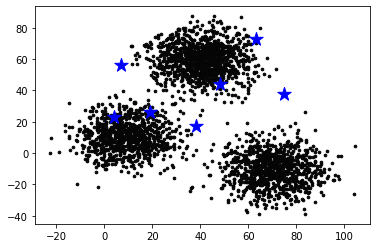

In [ ]:
# Plotting along with the Centroids
%matplotlib inline
plt.scatter(f1, f2, c='#050505', s=7)
plt.scatter(x, y, marker='*', s=200, c='B')
plt.show()

IndexError: ignored

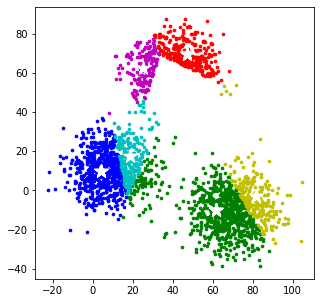

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

# To store the value of centroids when it updates
C_old = np.zeros(C.shape)
# Cluster Lables(0, 1, 2)
clusters = np.zeros(len(X))
# Error func. - Distance between new centroids and old centroids
error = dist(C, C_old, None)

# Loop will run till the error becomes zero
fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(111)
plt.ion()# turning on plot in interactive mode. This is because, as you'll see below, the plot keeps getting updated in loop.
while error >= 0.1:
    
    colors = ['r', 'g', 'b', 'y', 'c', 'm']
    
    # Assigning each value to its closest cluster
  
    for i in range(len(X)):
        distances = dist(X[i], C)#This find distance of X[i] from each of the 5 centroid points contained within C
        cluster = np.argmin(distances)# Out of all the distances found above, the centroid with the least distance is found here
        clusters[i] = cluster #The cluster center found above is now the new cluster assignment for the point X[i]

    # Storing the old centroid values
    C_old = deepcopy(C)# we use deep copy here because we don't want the changes in array C to be reflecting in C_old (because assignment is by reference)
    # Finding the new centroids by taking the average value
    
    for i in range(k):#we iterate through each of the 5 clusters.
        points = [X[j] for j in range(len(X)) if clusters[j] == i]#we pull out all the points that were assigned to the new cluster above (in 'clusters' variabe)
        C[i] = np.mean(points, axis=0)#Using the points above, we recomupte the new center, by taking the mean.

    error = dist(C, C_old, None)#now we compare the error between the new cluster centres and the old cluster centres.
    #print(k)
    ax.clear()
    for i in range(k):
        points = np.array([X[j] for j in range(len(X)) if clusters[j] == i])
        plt.scatter(points[:, 0], points[:, 1], s=7, c=colors[i])
        plt.scatter(C[:, 0], C[:, 1], marker='*', s=200, c='w')

    print("error:",error)